In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import datetime
from dateutil import relativedelta
from preparation import load_data, extract_features, extract_sales_feat

ModuleNotFoundError: No module named 'preparation'

In [2]:
df, df_store = load_data(debug=False)
feat_matrix, features_x, feature_y = extract_features(df, df_store)

data loaded: (1058297, 11)
store loaded: (1115, 11)
extract_sales_feat: done
extract_recent_data: done
extract_store_feat: done
construct feature matrix: done
selected_features: done
process_missing: done
process_outliers: done
all features: ['AvgSales', 'AvgCustomersMonth', 'SchoolHoliday', 'DayOfMonth', 'AvgCustomers', 'AvgSales3Months', 'AvgSalesWeek', 'Promo', 'Assortment', 'DayOfWeek', 'Promo2Weeks', 'AvgStateHoliday', 'CompetitionDistance', 'AvgPromo', 'CompetitionOpenSince', 'Week', 'DateInt', 'AvgCustomersWeek', 'Promo2', 'HolidayLastWeek', 'StateHoliday', 'HolidayNextWeek', 'StoreType', 'AvgCustomers3Months', 'DayOfYear', 'AvgSalesMonth', 'AvgSchoolHoliday', 'Month', 'Year']
target: SalesLog
feature matrix dimension: (1058243, 35)


In [ ]:
train = feat_matrix[feat_matrix['Type'] == 'train']
test = feat_matrix[feat_matrix['Type'] == 'test']
val_2014 = feat_matrix.loc[(feat_matrix['DateInt'] >= 20140801) & (feat_matrix['DateInt'] <= 20140917)]
val_2013 = feat_matrix.loc[(feat_matrix['DateInt'] >= 20130801) & (feat_matrix['DateInt'] <= 20130917)]

### verify the distribution of Promo for different periods

### all training data

In [4]:
train['Promo'].value_counts() / train.shape[0]

0    0.619145
1    0.380855
Name: Promo, dtype: float64

### 6 weeks in 2013

In [5]:
val_2013['Promo'].value_counts() / val_2013.shape[0]

0    0.645832
1    0.354168
Name: Promo, dtype: float64

### 6 weeks in 2014

In [6]:
val_2014['Promo'].value_counts() / val_2014.shape[0]

0    0.604194
1    0.395806
Name: Promo, dtype: float64

### 6 weeks of test

In [7]:
test['Promo'].value_counts() / test.shape[0]

0    0.604167
1    0.395833
Name: Promo, dtype: float64

### verify the distribution of Promo2 for different periods


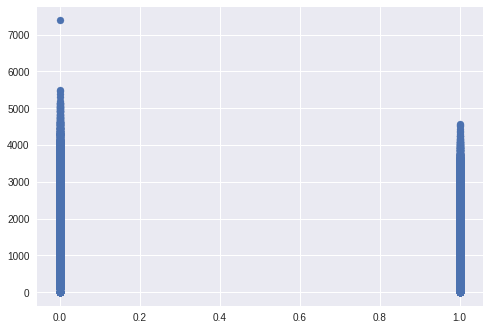

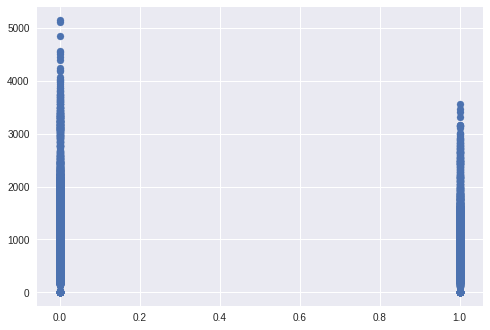

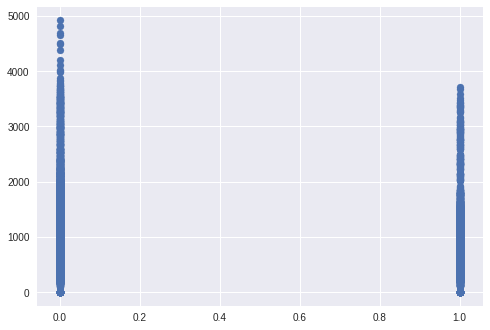

In [8]:
plt.scatter(train['Promo2'], train['Customers'])
plt.show()
plt.scatter(val_2013['Promo2'], val_2013['Customers'])
plt.show()
plt.scatter(val_2014['Promo2'], val_2014['Customers'])
plt.show()

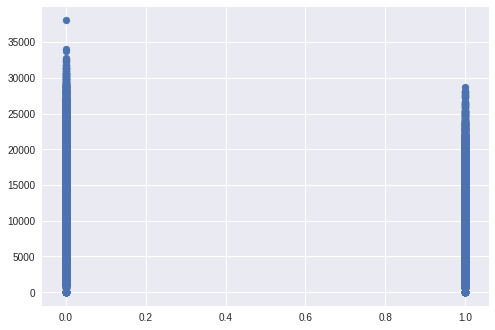

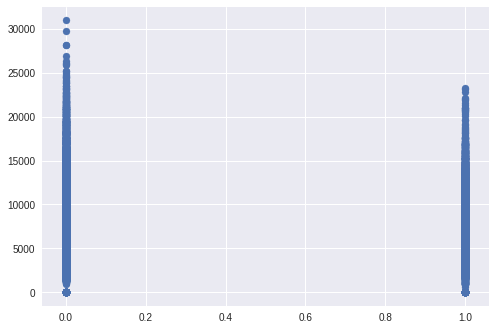

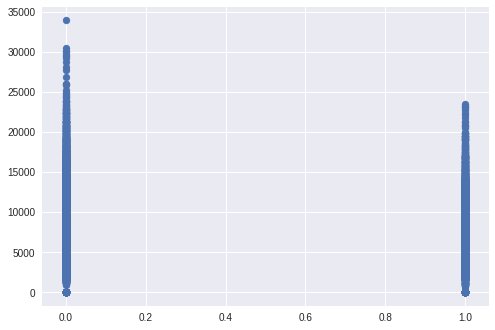

In [9]:
plt.scatter(train['Promo2'], train['Sales'])
plt.show()
plt.scatter(val_2013['Promo2'], val_2013['Sales'])
plt.show()
plt.scatter(val_2014['Promo2'], val_2014['Sales'])
plt.show()

In [10]:
sum(train[train['Promo2'] == 1]['Sales']) / sum(train['Sales']) 

0.4662158702867683

In [11]:
sum(val_2014[val_2014['Promo2'] == 1]['Sales']) / sum(val_2014['Sales']) 

0.4162563191994394

In [12]:
sum(val_2013[val_2013['Promo2'] == 1]['Sales']) / sum(val_2013['Sales']) 

0.47294994037383886

In [ ]:
from outliers import smirnov_grubbs as grubbs


In [14]:
print(train.shape)
len(grubbs.max_test_outliers(train['Customers'], alpha=0.05))

(972282, 35)


/usr/local/lib/python3.6/dist-packages/outliers/smirnov_grubbs.py:185: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return data.argmax()


4708

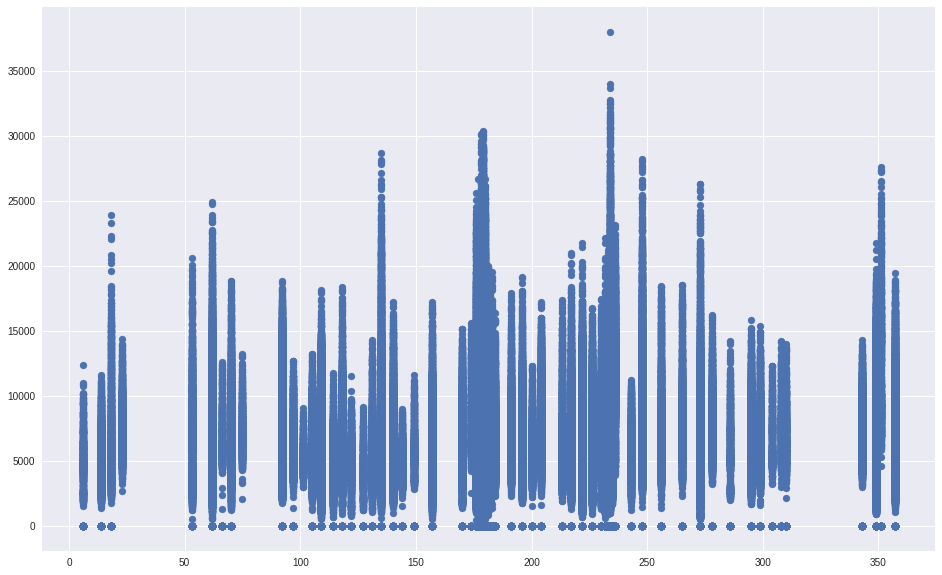

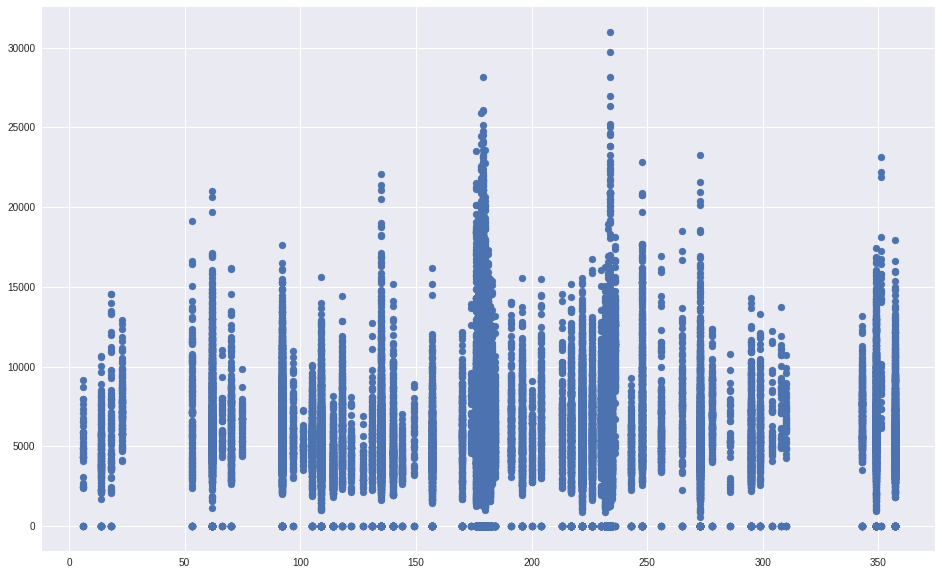

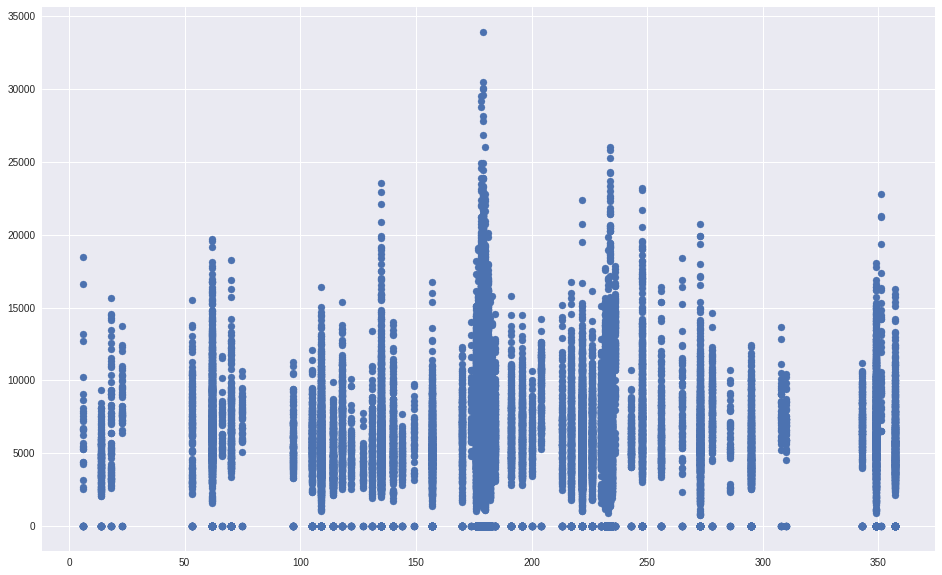

In [17]:
plt.figure(figsize=(16, 10))
plt.scatter(train['Promo2Weeks'], train['Sales'])
plt.show()
plt.figure(figsize=(16, 10))
plt.scatter(val_2013['Promo2Weeks'], val_2013['Sales'])
plt.show()
plt.figure(figsize=(16, 10))
plt.scatter(val_2014['Promo2Weeks'], val_2014['Sales'])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [33]:
X = train['Promo2Weeks'].as_matrix().reshape(-1, 1)
reg = LinearRegression().fit(X, train['Sales'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [34]:
reg.coef_

array([-0.21066538])

In [35]:
reg.intercept_

6303.451801193018

In [36]:
X = val_2013['Promo2Weeks'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, val_2013['Sales'])
print(reg.coef_)
print(reg.intercept_)

[-0.13601416]
6055.487831130845


In [37]:
X = val_2014['Promo2Weeks'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, val_2014['Sales'])
print(reg.coef_)
print(reg.intercept_)

[1.14145355]
5624.384816136276


In [38]:
X = train['Promo2Weeks'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, train['Customers'])
print(reg.coef_)
print(reg.intercept_)

[-0.15163605]
660.9139948792722


In [39]:
X = val_2013['Promo2Weeks'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, val_2013['Customers'])
print(reg.coef_)
print(reg.intercept_)

[-0.14366584]
658.7446777542658


In [40]:
X = val_2014['Promo2Weeks'].values.reshape(-1, 1)
reg = LinearRegression().fit(X, val_2014['Customers'])
print(reg.coef_)
print(reg.intercept_)

[-0.10163708]
677.7068006565348


In [ ]:
import numpy as np    

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

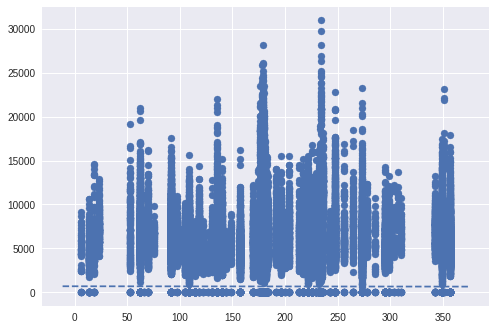

In [42]:
plt.scatter(val_2013['Promo2Weeks'], val_2013['Sales'])
abline(reg.coef_, reg.intercept_)

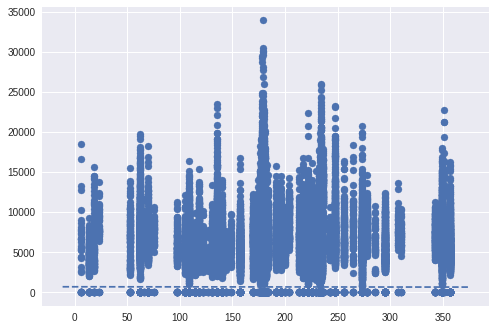

In [43]:
plt.scatter(val_2014['Promo2Weeks'], val_2014['Sales'])
abline(reg.coef_, reg.intercept_)

In [50]:
df = pd.read_pickle("D:\\workspace\\sales-prediction\\data\\feat_matrix.pkl")

In [51]:
df[df['Promo2Weeks'] == 0].shape

(0, 35)

In [30]:
def promo2_weeks(line):
    return (2015 - line['Promo2SinceYear']) * 52 + line['Promo2SinceWeek']

In [48]:
df_store = pd.read_csv("D:\\workspace\\sales-prediction\\data\\store.csv")
df_store['Promo2SinceYear'] = df_store['Promo2SinceYear'].fillna(2015)
df_store['Promo2SinceWeek'] = df_store['Promo2SinceWeek'].fillna(0)
df_store['Promo2Weeks'] = df_store.apply(lambda row: promo2_weeks(row), axis=1).astype(np.int64)

In [49]:
df_store[df_store['Promo2Weeks'] == 0]['Promo2Weeks'].shape

(544,)

In [21]:
df_store['Promo2SinceWeek'].isna().sum()

544